In [1]:
# Task1a: Interpreting Logistic Regression model
# a. Thomas studied for two hours and did not attend the review session.
# What is his (1) log odds, (2) odds, and (3) likelihood of passing the exam?

import numpy as np

# Given values
hours_studied_thomas = 2
review_session_thomas = 0  # did not attend

# Coefficients from the logistic regression model
intercept = -3
coef_hours_studied = 0.8
coef_review_session = 1.5

# Calculate log odds, odds, and likelihood of passing
log_odds_thomas = intercept + coef_hours_studied * hours_studied_thomas + coef_review_session * review_session_thomas
odds_thomas = np.exp(log_odds_thomas)
likelihood_thomas = odds_thomas / (1 + odds_thomas)

log_odds_thomas, odds_thomas, likelihood_thomas

(-1.4, 0.2465969639416065, 0.19781611144141825)

In [2]:
# b. If Thomas goes to the review session, what is the updated 1) log_odds,
# (2) odds, and (3) likelihood of passing the exam?

# Updating the review_session value for Thomas attending the review
review_session_thomas = 1  # attended

# Recalculate log odds, odds, and likelihood of passing for the updated values
log_odds_thomas_review = intercept + coef_hours_studied * hours_studied_thomas + coef_review_session * review_session_thomas
odds_thomas_review = np.exp(log_odds_thomas_review)
likelihood_thomas_review = odds_thomas_review / (1 + odds_thomas_review)

log_odds_thomas_review, odds_thomas_review, likelihood_thomas_review


(0.10000000000000009, 1.1051709180756477, 0.52497918747894)

In [15]:
# See Task1a Interpreting Logistic Regression model.docx for c. - h.

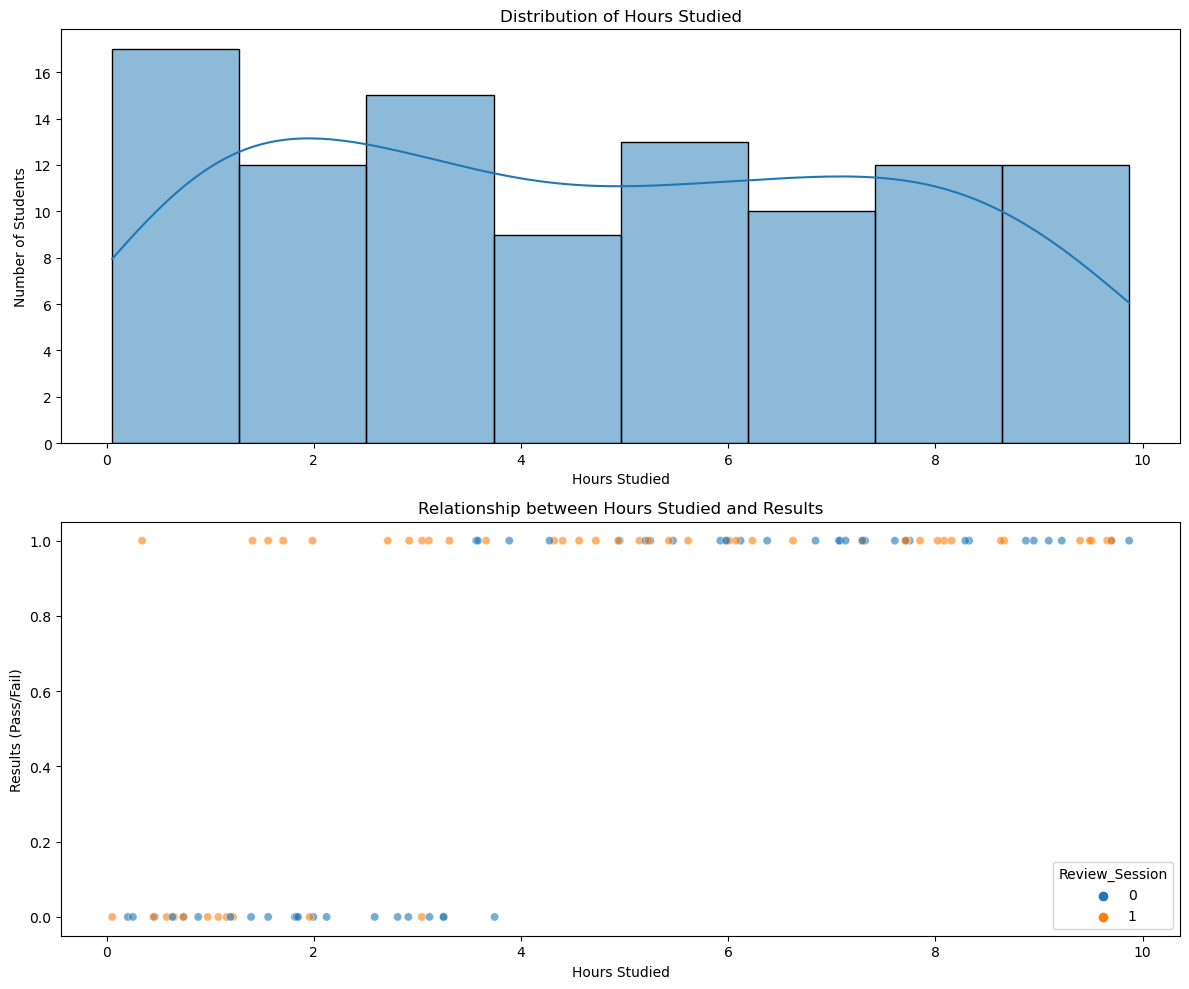

In [6]:
# Task 1b: Build a logistic regression model 
# (1) create a visualization of the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
student_data = pd.read_csv('student_data.csv')

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Distribution of hours studied
sns.histplot(student_data['Hours_Studied'], kde=True, ax=ax[0])
ax[0].set_title('Distribution of Hours Studied')
ax[0].set_xlabel('Hours Studied')
ax[0].set_ylabel('Number of Students')

# Relationship between hours studied and results, with distinction for review session
sns.scatterplot(data=student_data, x='Hours_Studied', y='Results', hue='Review_Session', ax=ax[1], alpha=0.6)
ax[1].set_title('Relationship between Hours Studied and Results')
ax[1].set_xlabel('Hours Studied')
ax[1].set_ylabel('Results (Pass/Fail)')

plt.tight_layout()
plt.show()



In [7]:
# (2) fit a model using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Splitting the data into training and testing sets
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

accuracy, auc


(0.8666666666666667, 0.94)

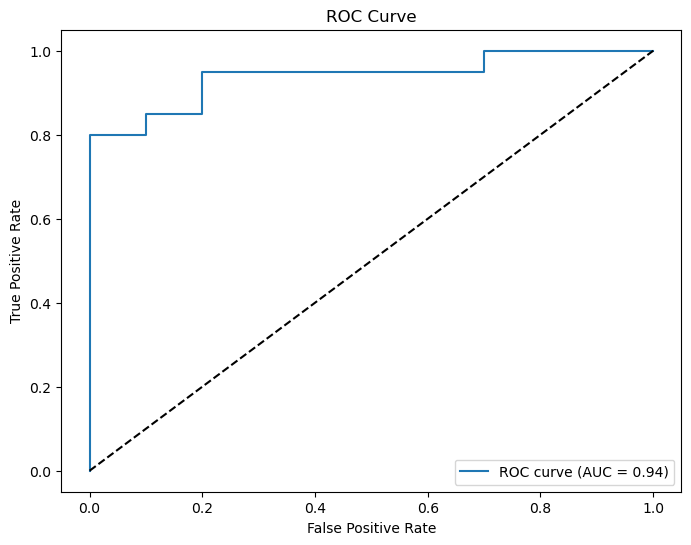

(array([1.57480245, 1.294014  ]), -5.097076829237696)

In [9]:
# (3) output model coefficients and performance metrics such as accuracy and AUC and ROC

# Extracting model coefficients
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

coefficients, intercept

In [10]:
# Coefficient for Hours_Studied: ≈ 1.575
# Coefficient for Review_Session: ≈ 1.294
# Intercept: ≈ −5.097

In [11]:
#Task 2:  Understanding and Prevent Overfitting in the context of SVM 

from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
# Write code to fit a Support Vector Machine model using
# (1) linear kernel and
# (2) RBF kernel. For the RBF kernel, use grid search to
# find the best gamma parameter using k-fold cross-validation. 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Fit SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# 2. Fit SVM with RBF kernel and grid search for best gamma
param_grid = {'gamma': [1e-3, 1e-4, 1e-5, 1e-6, 'scale', 'auto']}
svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_gamma = grid_search.best_params_['gamma']
y_pred_rbf = grid_search.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

accuracy_linear, best_gamma, accuracy_rbf


(0.8666666666666667, 'scale', 0.8666666666666667)

In [14]:
# SVM with Linear Kernel:
# Accuracy: 86.67%

# SVM with RBF Kernel:
# Accuracy with Best Gamma: 86.67%